## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
! git clone https://www.github.com/ds4e/clustering


fatal: destination path 'clustering' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

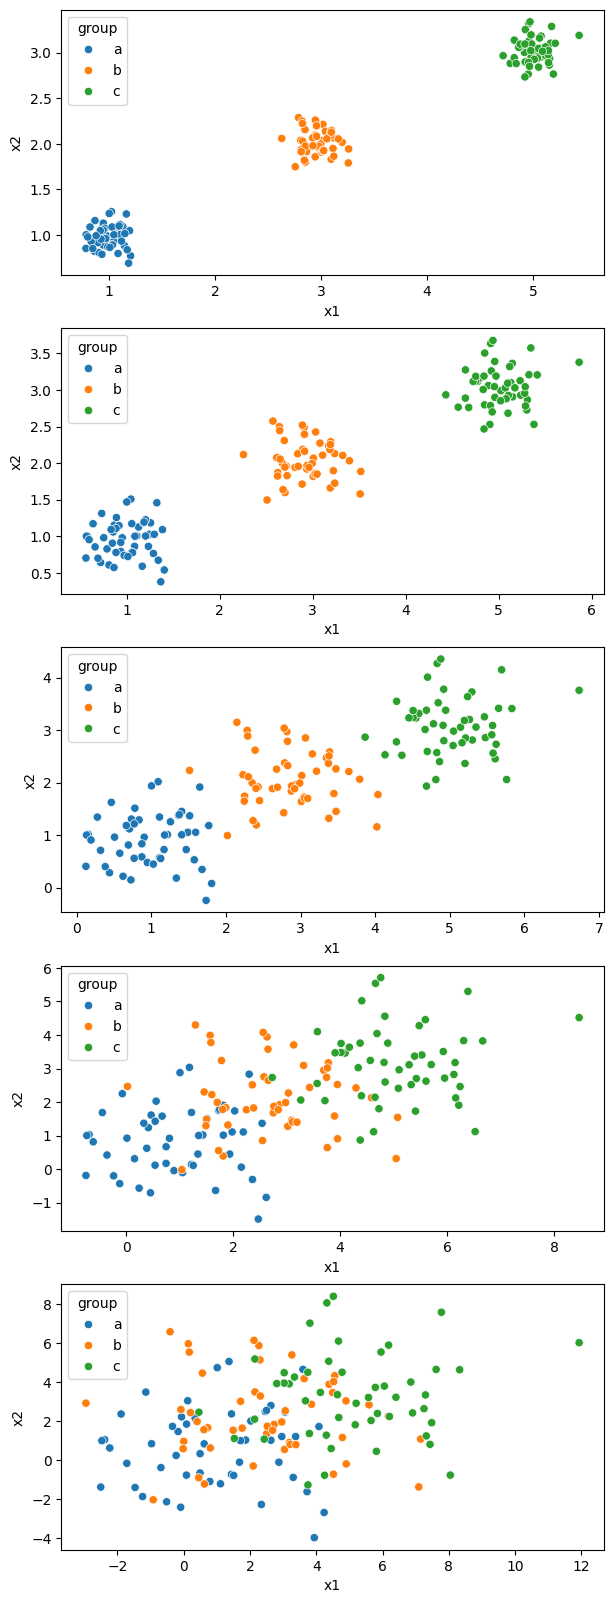

In [ ]:
points= [(df0_125), (df0_25), (df0_5),(df1_0), (df2_0)] # this is the dataset as a list

fig, axes= plt.subplots(5,1, figsize=(7,20))
for i in range(len(points)):
    sns.scatterplot(data=points[i], x='x1', y='x2', hue='group', ax=axes[i])

plt.show()

As the noise goes up from 0.125 to 2.0, the visual distincness of the clusters becomes less distinct. For example, the 0.125-0.5 ( you can see seperate clusters, but then it merges together.).

CREATING SCREE PLOT

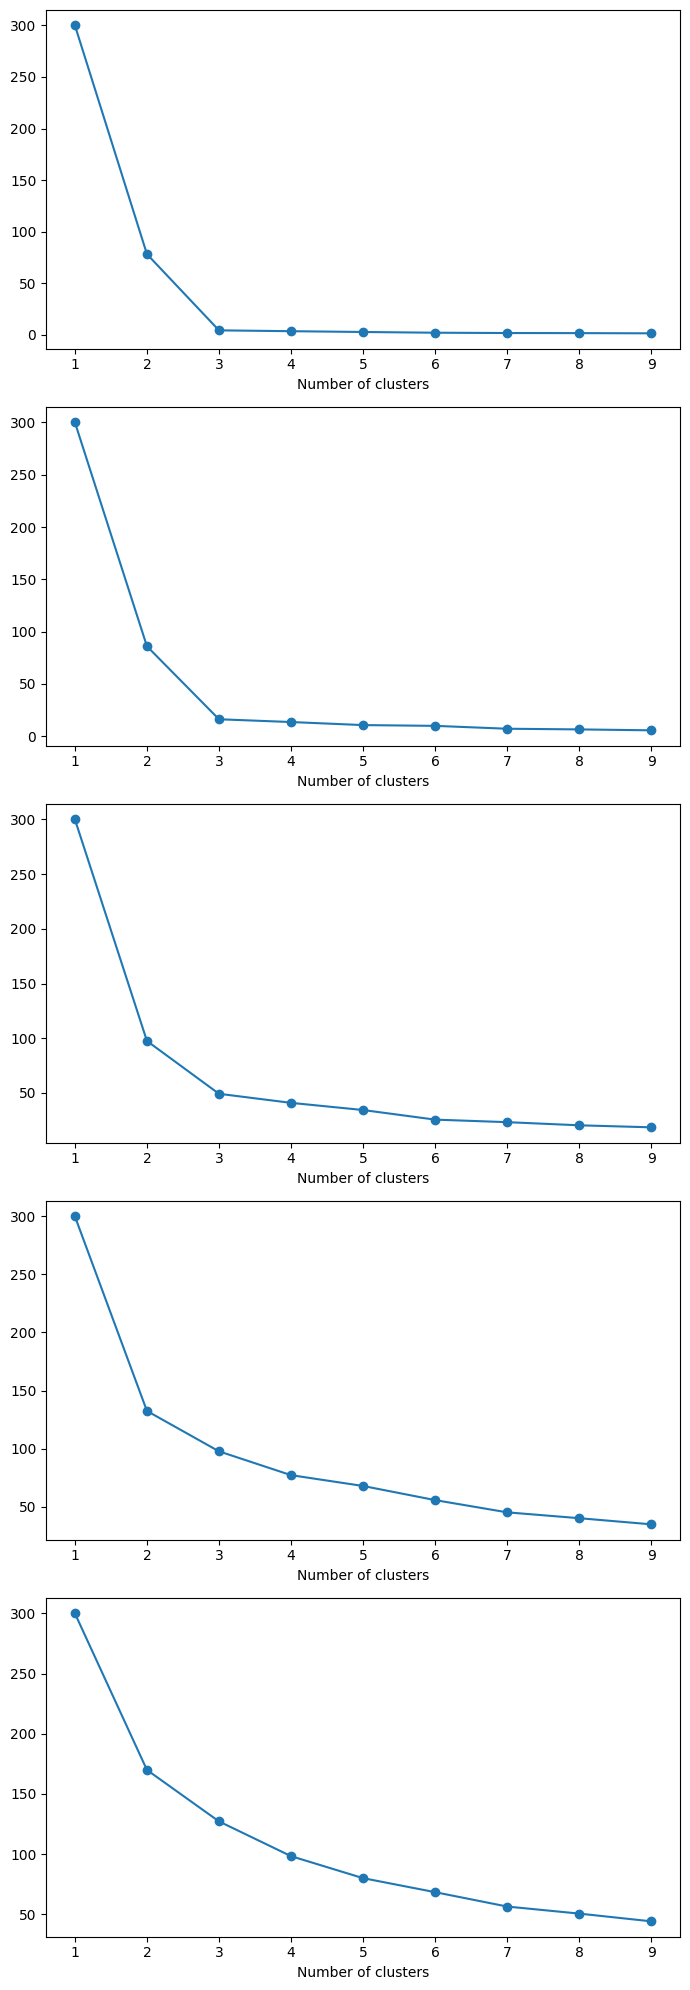

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


dfs = [df0_125, df0_25, df0_5, df1_0, df2_0]

fig, axes = plt.subplots(len(dfs), 1, figsize=(7, 20))

# Asked CHAT GTP TO HELP ME WRITE/ INITATE THE FOR LOOP
for i, df in enumerate(dfs):
    # Extract features
    X = df[['x1', 'x2']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Perform KMeans clustering for k=1 to 9
    vals = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_scaled)  # Fit to the data
        vals.append(kmeans.inertia_) # used the .inertia_ module to help compute summ of squared distances betwen each datapoint

    # Plot the scree plot for  datasets
    axes[i].plot(range(1, 10),vals, marker='o')
    axes[i].set_xlabel('Number of clusters')
plt.tight_layout()
plt.show()

It looks like that as the noise level increases, the sharpness of the "elbow" seems to smooth out and clusters blend together.

Intuition of the Elbow method. This shows that the sum of squared distances between each data point- and of centroid of cluster. Lower y-values of the plot indicate that the data points are tightly packed and close to their centorids. In this case, as the noise level increases, the sum of squared distances becomes less sharply defined. But for the least noise level, we can see clearly that the optimal number of clusters was the lowest y value ( 3) and anything beyond it would be little changes. This also connects to overfit and underfit ( underfitt meaning only a small number of clusters and close points would fall into them ( making the sum of squared differecnes greater. And overfitting by each data point having it's own cluster and the sum of squared differences being really small ( but too specific)

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [ ]:
df1= pd.read_csv('clustering/assignment/data/airbnb_hw.csv')
df1.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


CLEANING PRICE, BEDS, NUMBER OF REVIEWS, and Review Scores Rating

In [ ]:
df1.isnull().sum()

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [ ]:
# Importing Packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
print(missing_percentage) # this calculates the percentage of missing data from the dataframe

Host Id                        0.000000
Host Since                     0.009843
Name                           0.000000
Neighbourhood                  0.000000
Property Type                  0.009843
Review Scores Rating (bin)    27.308222
Room Type                      0.000000
Zipcode                        0.439661
Beds                           0.278890
Number of Records              0.000000
Number Of Reviews              0.000000
Price                          0.000000
Review Scores Rating          27.308222
dtype: float64


It looks like we can drop the missing columns as 27 percent isn't that much of missing data.

In [ ]:
# Dropping missing values
df1= df1.dropna(subset= ["Beds", "Number Of Reviews", "Review Scores Rating (bin)"])

In [ ]:
df1['Price'] = df1['Price'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype(float)


In [ ]:
#Re-checking for missing values

missing_percentage = (df1.isnull().sum() / len(df1)) * 100
print(missing_percentage)

Host Id                       0.000000
Host Since                    0.000000
Name                          0.000000
Neighbourhood                 0.000000
Property Type                 0.009045
Review Scores Rating (bin)    0.000000
Room Type                     0.000000
Zipcode                       0.447741
Beds                          0.000000
Number of Records             0.000000
Number Of Reviews             0.000000
Price                         0.000000
Review Scores Rating          0.000000
dtype: float64


In [ ]:
#Normalizing the columns
scaler= MinMaxScaler()
a= ['Beds', 'Number Of Reviews', 'Review Scores Rating (bin)']
df1[a]= scaler.fit_transform(df1[a])
scaled_df = df1[a]


In [ ]:
scaled_df.isnull().sum()

,0
Beds,0
Number Of Reviews,0
Review Scores Rating (bin),0


In [ ]:
kmeans= KMeans(n_clusters=6, random_state= 42, n_init=10)
df1['Cluster']= kmeans.fit_predict(scaled_df)

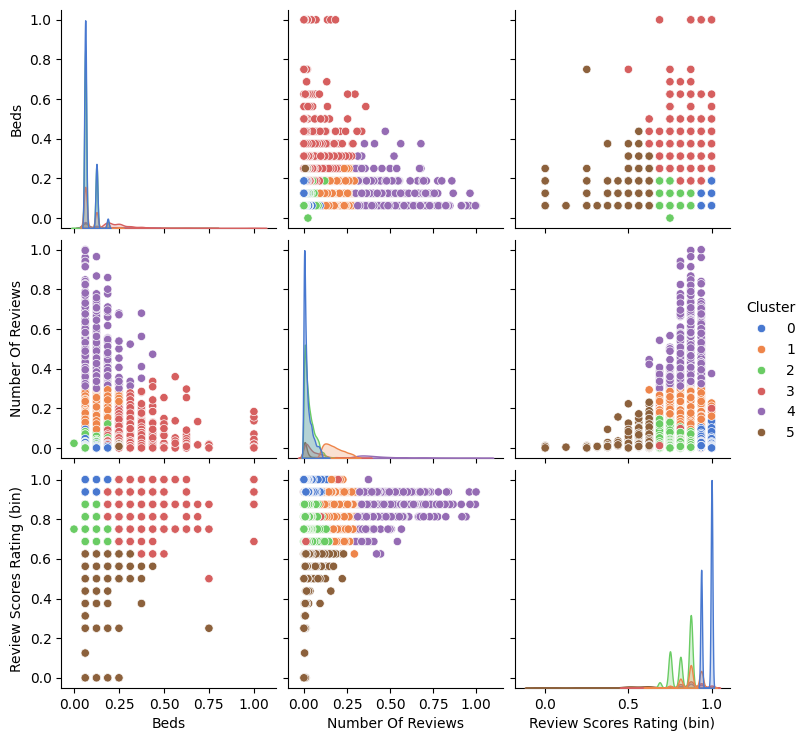

In [ ]:
sns.pairplot(df1, hue='Cluster',vars=["Beds", "Number Of Reviews", "Review Scores Rating (bin)"],  palette= 'muted')
plt.show()

In [ ]:
cluster1= df1.groupby('Cluster')['Price'].describe()
print(cluster1)


          count        mean         std   min    25%    50%    75%      max
Cluster                                                                    
0        8430.0  154.484935  158.483673  10.0   85.0  130.0  195.0  10000.0
1        2954.0  142.079215   84.303713  22.0   88.0  125.0  175.0   1000.0
2        7497.0  133.820862   97.671697  20.0   79.0  119.0  170.0   5000.0
3        1684.0  291.995249  259.957495  27.0  150.0  225.0  350.0   4500.0
4         775.0  133.110968   83.573023  27.0   80.0  109.0  165.0    875.0
5         771.0  133.084306  199.549289  25.0   65.0   99.0  150.0   5000.0


It looks like cluster 3, 0 and 1 have the highest rental price ( 291, 154, and 142, respectivly)

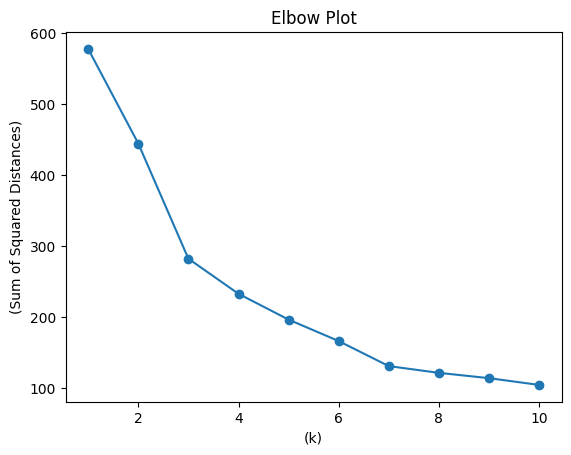

In [ ]:
c= []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(scaled_df)  # Fit to the data
        c.append(kmeans.inertia_) # used the .inertia_ module to help compute summ of squared distances betwen each datapoint

plt.plot(range(1, 11), c, marker='o')
plt.title('Elbow Plot')
plt.xlabel('(k)')
plt.ylabel('(Sum of Squared Distances)')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=8, random_state= 42, n_init=10)
df1['Cluster']= kmeans.fit_predict(scaled_df)

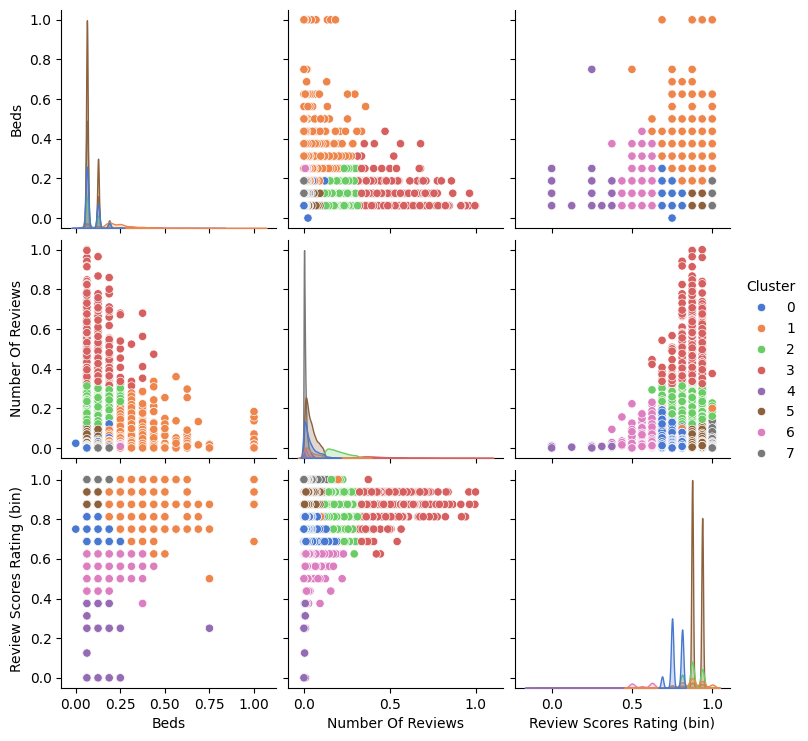

In [ ]:
sns.pairplot(df1, hue='Cluster',vars=["Beds", "Number Of Reviews", "Review Scores Rating (bin)"],  palette= 'muted')
plt.show()

In [ ]:
cluster1= df1.groupby('Cluster')['Price'].describe()
print(cluster1)

          count        mean         std   min    25%    50%     75%      max
Cluster                                                                     
0        3824.0  130.671287  111.302678  20.0   75.0  110.0  165.00   5000.0
1        1680.0  292.188095  259.821644  27.0  150.0  225.0  350.00   4500.0
2        2499.0  139.532613   82.424355  22.0   85.0  120.0  175.00    895.0
3         662.0  132.516616   77.746215  29.0   80.0  110.0  165.00    649.0
4         118.0  147.618644  456.169164  30.0   60.0   80.5  135.00   5000.0
5        7293.0  145.778143  143.277354  25.0   85.0  129.0  180.00  10000.0
6         658.0  131.949848  101.150244  25.0   65.0  100.0  169.75    799.0
7        5377.0  154.058211  130.807233  10.0   85.0  125.0  190.00   3500.0


It looks like the cluster (1) and cluster (4) not 0 has the highest mean rental prices an

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?